In [22]:
#INTRODUCTION OF PACKAGES AND DATASET

#Importing required packages
import pandas as pd
import seaborn as sb

#reading the data into a pandas DataFrame
data = pd.read_csv('C:\\Users\\pusul\\Desktop\\datasets\\students-performance-in-exams\\StudentsPerformance.csv')


#pandas knows to treat rows with 'NA' as missing values.
data = pd.read_csv('C:\\Users\\pusul\\Desktop\\datasets\\students-performance-in-exams\\StudentsPerformance.csv', na_values=['NA'])

#printing out some summary statistics about the data set
data.describe()

#priting the size of the data set
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


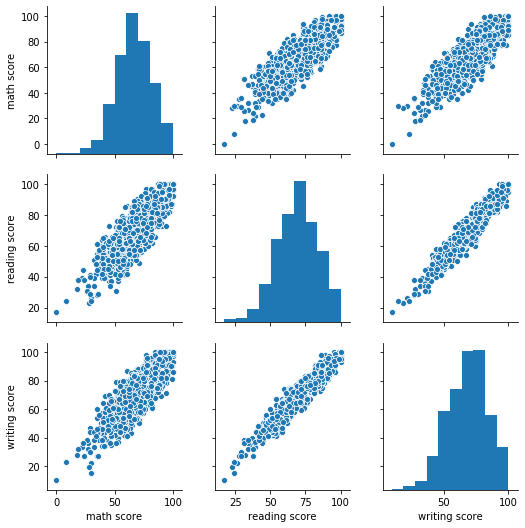

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

#creating a scatterplot matrix

sb.pairplot(data.dropna());


In [ ]:
EXPLORATORY DATA ANALYSIS


Text(0.5, 0, 'Writing')

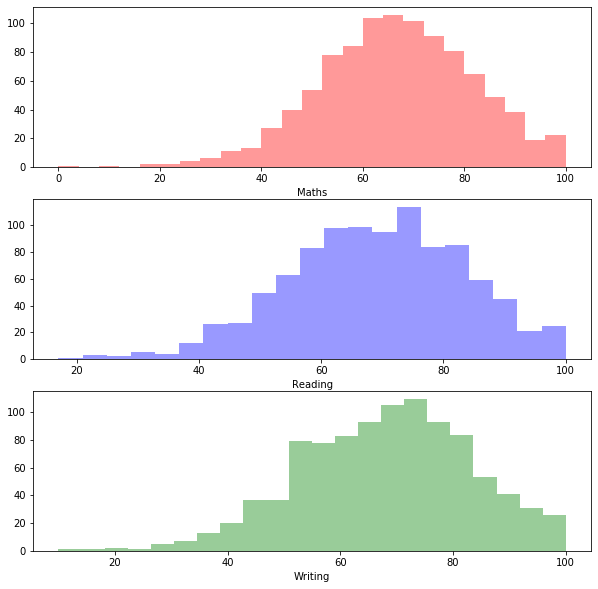

In [9]:
#GENERAL SCORE DISTRIBUTION FOR MATH,READING,WRITING

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb


fig0, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize = [10, 10])

# plotting histograms for the math,reading and writing scores
sb.distplot(data["math score"], kde = False, label = "Maths", ax = ax0, color = 'r')
ax0.set_xlabel("Maths")
sb.distplot(data["reading score"], kde = False, label = "Reading", ax = ax1, color = 'b')
ax1.set_xlabel("Reading")
sb.distplot(data["writing score"], kde = False, label = "Writing", ax = ax2, color = 'g')
ax2.set_xlabel("Writing")


,Mean of Male,Mean of Female
math score,68.728216,63.633205
reading score,65.473029,72.608108
writing score,63.311203,72.467181


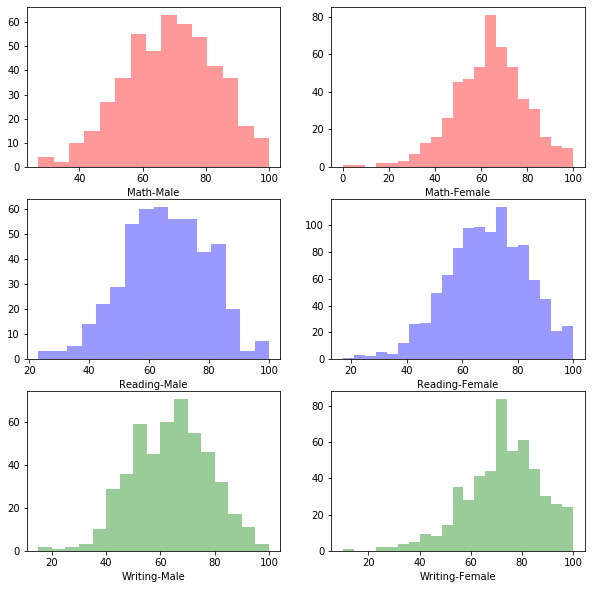

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb


fig1, ((ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(3, 2, figsize = [10, 10])

# plotting histograms for scores based on gender
data_male = data[data["gender"] == "male"]
data_female = data[data["gender"] == "female"]

sb.distplot(data_male["math score"], kde = False, label = "Maths", ax = ax3, color = 'r')
ax3.set_xlabel("Math-Male")
sb.distplot(data_female["math score"], kde = False, label = "Maths", ax = ax4, color = 'r')
ax4.set_xlabel("Math-Female")
sb.distplot(data_male["reading score"], kde = False, label = "Reading", ax = ax5, color = 'b')
ax5.set_xlabel("Reading-Male")
sb.distplot(data["reading score"], kde = False, label = "Reading", ax = ax6, color = 'b')
ax6.set_xlabel("Reading-Female")
sb.distplot(data_male["writing score"], kde = False, label = "Writing", ax = ax7, color = 'g')
ax7.set_xlabel("Writing-Male")
sb.distplot(data_female["writing score"], kde = False, label = "writing", ax = ax8, color = 'g')
ax8.set_xlabel("Writing-Female")

# Visualise the average score based on gender
male_mean = data_male[["math score", "reading score", "writing score"]].mean()
female_mean = data_female[["math score", "reading score", "writing score"]].mean()
mean_scores_by_gender = pd.concat([male_mean, female_mean], axis = 1, names = ["test", "lol"])
mean_scores_by_gender.columns = ["Mean of Male", "Mean of Female"] 
display(mean_scores_by_gender)


array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

,bachelor's degree,college,master's degree,associate's degree,high school
math score,69.389831,67.128319,69.745763,67.882883,62.786667
reading score,73.000000,69.460177,75.372881,70.927928,65.770667
writing score,73.381356,68.840708,75.677966,69.896396,63.613333


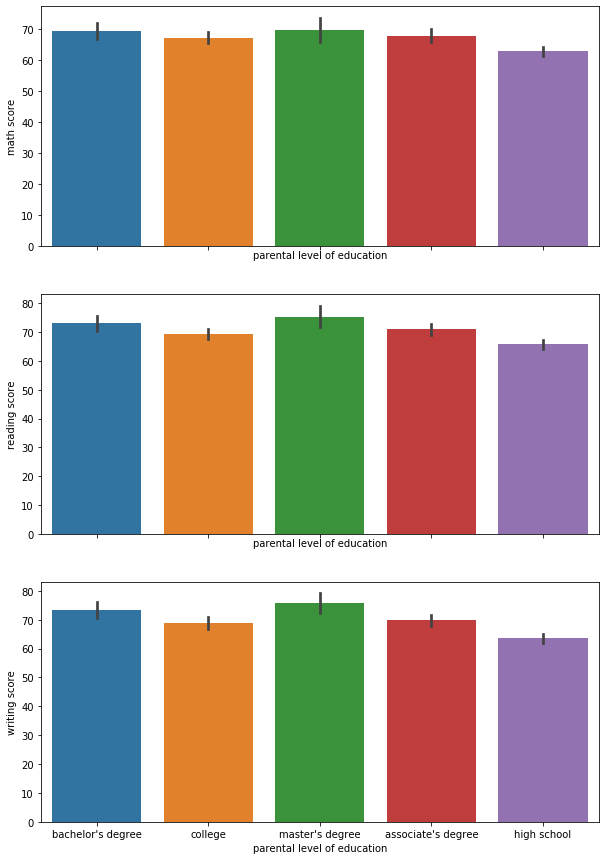

In [11]:
#SCORES BASED ON PARENTAL LEVEL OF EDUCATION

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from IPython.display import display

# Based on parental level of education
display(data["parental level of education"].unique())
data["parental level of education"] = data["parental level of education"].map(lambda x: "high school" if x == "some high school" else x)
data["parental level of education"] = data["parental level of education"].map(lambda x: "college" if x == "some college" else x)
education_level_list = data["parental level of education"].unique()
df_mean = pd.Series()
fig2 , ax = plt.subplots(3, 1, figsize = [10, 15], sharex= True)

# creating a table for mean values
for i, education_level in enumerate(education_level_list):
    mean = data[data["parental level of education"] == education_level].mean()
    mean = mean.rename(education_level)
    df_mean = pd.concat([df_mean, mean], axis = 1, sort = False)

df_mean = df_mean.drop(df_mean.columns[0], axis = 1)

#Based on parental education
ax[0] = sb.barplot(x = "parental level of education", y = "math score",data = data, estimator = np.mean, ax = ax[0])
ax[1] = sb.barplot(x = "parental level of education", y = "reading score", data = data, estimator = np.mean, ax = ax[1])
ax[2] = sb.barplot(x = "parental level of education", y = "writing score", data = data, estimator = np.mean, ax = ax[2])
    

#displaying the mean table
display(df_mean)



,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


array(['none', 'completed'], dtype=object)

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


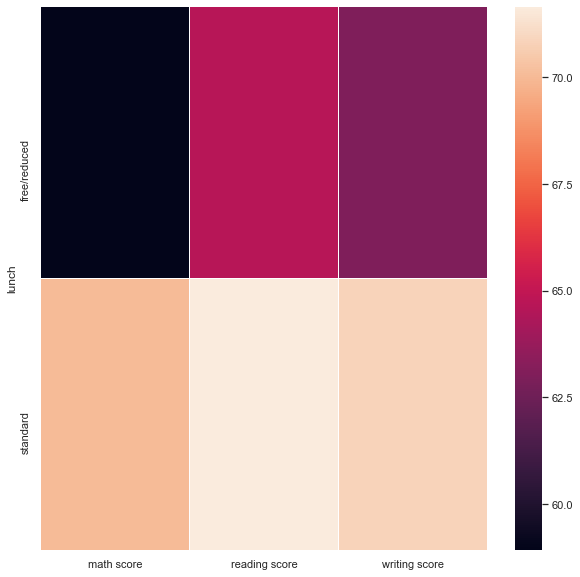

In [35]:
#SCORES BASED ON LUNCH TYPE

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from IPython.display import display

# Based on the lunch type
data_lunch = data[["lunch", "math score", "reading score", "writing score"]].copy()
data_lunch = data_lunch.groupby(by = ["lunch"]).mean()
# Display the table and the heatmap
display(data_lunch)
fig5, ax10 = plt.subplots(figsize=(10, 10))
sb.heatmap(data_lunch,linewidths=.1, ax=ax10)

#SCORES BASED ON PREPARATION OF COURSE

# Based on the preparation
display(data["test preparation course"].unique())
data_preparation = data[["test preparation course", "math score", "reading score", "writing score"]].copy()
data_preparation = data_preparation.groupby(by = ["test preparation course"]).mean()
display(data_preparation)

C:\Users\pusul\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


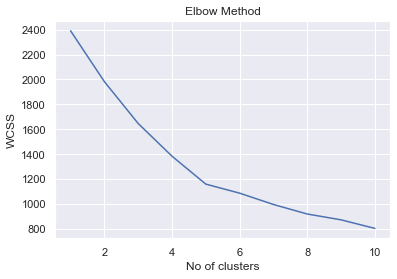

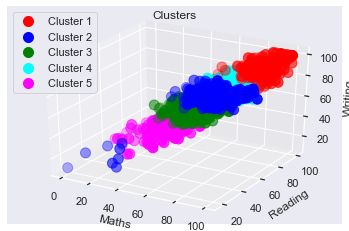

In [34]:
#CLUSTERING AND VISUALIZATION

import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from IPython.display import display

def score_labels(x):
    if x<35:
        return "Lowest"
    if x>=35 and x<55:
        return "Below Average"
    if x>=55 and x<65:
        return "Average"
    if x>=65 and x<75:
        return "Above Average"
    if x>=75 and x<85:
        return "Good"
    if x>=85 and x<=100:
        return "Highest"    
sb.set()

# Read the data
data = pd.read_csv("C:\\Users\\pusul\\Desktop\\datasets\\students-performance-in-exams\\StudentsPerformance.csv")
"""
Create classes for the exam scores
0-35%    - lowest
35-55%   - below average
55-65%   - average
65%-75%  - above average
75-85%   - good
85%-100% - highest
"""
# Make an average score from 3 exams and label them as above
average_score = data.iloc[:,-3:]
x_num =  data.iloc[:,-3:]
average_score = average_score.applymap(score_labels)
x = average_score
x_copy = x.copy()

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
hot_enc   = OneHotEncoder()
label_enc = LabelEncoder()

x = x.apply(label_enc.fit_transform)
x = hot_enc.fit_transform(x).toarray()


# Elbow Method here
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()
# n_clusters should be 5

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)
x_num["cluster"] = y_kmeans
# Visualising the clusters
from mpl_toolkits.mplot3d import axes3d
fig6 = plt.figure()
ax11 = fig6.add_subplot(111, projection='3d')

ax11.scatter((x_num[x_num.cluster == 0])["math score"].values, (x_num[x_num.cluster == 0])["reading score"].values, (x_num[x_num.cluster == 0])["writing score"].values, s = 100, c = 'red', label = 'Cluster 1')
ax11.scatter((x_num[x_num.cluster == 1])["math score"].values, (x_num[x_num.cluster == 1])["reading score"].values, (x_num[x_num.cluster == 1])["writing score"].values, s = 100, c = 'blue', label = 'Cluster 2')
ax11.scatter((x_num[x_num.cluster == 2])["math score"].values, (x_num[x_num.cluster == 2])["reading score"].values, (x_num[x_num.cluster == 2])["writing score"].values, s = 100, c = 'green', label = 'Cluster 3')
ax11.scatter((x_num[x_num.cluster == 3])["math score"].values, (x_num[x_num.cluster == 3])["reading score"].values, (x_num[x_num.cluster == 3])["writing score"].values, s = 100, c = 'cyan', label = 'Cluster 4')
ax11.scatter((x_num[x_num.cluster == 4])["math score"].values, (x_num[x_num.cluster == 4])["reading score"].values, (x_num[x_num.cluster == 4])["writing score"].values, s = 100, c = 'magenta', label = 'Cluster 5')

ax11.set_title('Clusters')
ax11.set_xlabel('Maths')
ax11.set_ylabel('Reading')
ax11.set_zlabel('Writing')
ax11.legend()

ValueError: could not convert string to float: 'female'

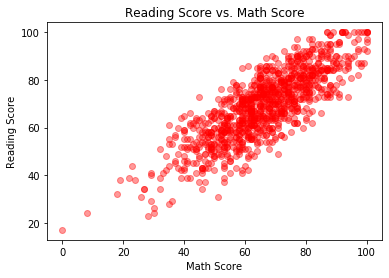

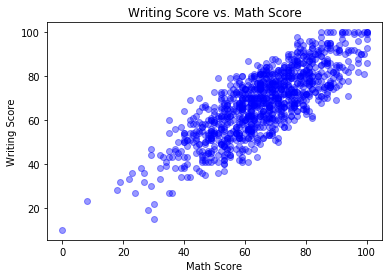

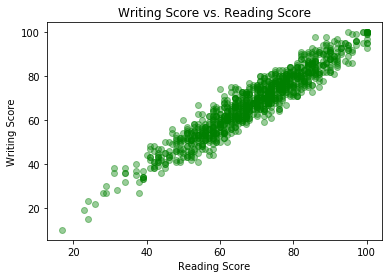

In [19]:
#LINEAR REGRESSION

plt.scatter(data['math score'],data['reading score'],alpha=0.4,color='red')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Reading Score vs. Math Score')
plt.show()

plt.scatter(data['math score'],data['writing score'],alpha=0.4,color='blue')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Writing Score vs. Math Score')
plt.show()

plt.scatter(data['reading score'],data['writing score'],alpha=0.4,color='green')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Writing Score vs. Reading Score')
plt.show()

In [21]:
math_reading=linear_model.LinearRegression()
mr=math_reading.fit(math,reading)
print('correlation between math and reading')
print(mr.score(math,reading))

math_writing=linear_model.LinearRegression()
mwr=math_writing.fit(math,writing)
print('correlation between math and writing')
print(mwr.score(math,writing))

reading_writing=linear_model.LinearRegression()
print('correlation between reading and writing')
rw=reading_writing.fit(reading,writing)
print(rw.score(reading,writing))

correlation between math and reading
0.6684365064501091
correlation between math and writing
0.6442342539264932
correlation between reading and writing
0.9112574888913137
